<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b> Diplomado de Análisis de datos y Machine Learning en Python - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> , <a href="mailto:semilleroscen@udea.edu.co"> ✉ Semilleros Facultad de Ciencias Exactas y Naturales </a><br>

Versión actualizada: 5-09-2020
</div>

<br>

**El presente curso hace parte del centro de Big Data de la Facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 4 horas los días sábado por Google Meet. Para un total de dedicación temporal de 45 horas. El curso cuenta con los siguientes módulos:

1. Introducción a Python (9H)
2. Datos y pre-procesado (9H)
3. Análisis exploratorio (9H)
4. Desarrollo del modelo (9H)
5. Machine learning (9H)



# **Estimador de densidad (Kenel Density Estimator)**

Un estimador de densidad es un algoritmo que busca modelar la distribución de probabilidad que generó un conjunto de datos. Un ejemplo de esto es el histograma: Cuando usamos histogramas utilizamos alguna forma de estimación de densidad. Es decir, aunque solo tenemos unos pocos puntos de datos discretos, asumimos que tenemos algún tipo de distribución continua, y nos gustaría saber cuál es esa distribución. 

Uno de los problemas con el uso de un histograma como estimador de densidad es que la elección del tamaño y ubicación de los bines puede conducir a representaciones que tienen características cualitativamente diferentes. En la siguiente figura se muestran dos histogramas diferentes para el mismo conjunto de datos: 

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/XYrUsRT.png" align="left" hspace="10px" vspace="0px"></p>

A la izquierda, vemos una distribución bimodal. A la derecha, vemos una distribución unimodal con una cola larga. Probablemente no adivinaríamos que estos dos histogramas se crearon a partir de los mismos datos. Podemos pensar en un histograma como una pila de bloques, donde apilamos un bloque dentro de cada bin en la parte superior de cada punto del conjunto de datos:

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/qcONTFT.png" align="left" hspace="10px" vspace="0px"></p>

El problema con este tipo de bineado se debe al hecho de que la altura de la pila de bloques a menudo no se refleja en la densidad real de los puntos cercanos, sino en las coincidencias de cómo se alinean los bins con los puntos de datos.

Pero, ¿qué pasa si, en lugar de apilar los bloques alineados con los bines, apilamos los bloques alineados con los puntos que representan? 

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/cZTVtlQ.png" align="left" hspace="10px" vspace="0px"></p>

El resultado parece un poco desordenado, pero es un reflejo mucho más sólido de las características de los datos reales que el histograma estándar. Aún así, los bordes no son estéticamente agradables, ni reflejan ninguna propiedad verdadera de los datos. Para suavizarlos, podríamos decidir reemplazar los bloques en cada ubicación con una función suave, por ejemplo con una gaussiana:

<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/oWdQPJI.png" align="left" hspace="10px" vspace="0px"></p>



Esta gráfica suavizada, da una idea mucho más precisa de la forma de la distribución de los datos. 

## KDE en la práctica

Las dos últimas gráficas son ejemplos de KDE en una dimensión. La idea básica aquí es ubicar una distribución (kernel) $K$ sobre cada punto 

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/isgKTAG.png" align="left" hspace="10px" vspace="0px"></p>

y sumar cada contribución para obtener una distribución de probabilidad $$f(x)=\frac{1}{N \cdot h}\displaystyle\sum_{i=1}^{N} k\left(\frac{x-x_i}{h}\right)$$

<p><img alt="Colaboratory logo" height="200px" src="https://i.imgur.com/iggiUXV.png" align="left" hspace="10px" vspace="0px"></p>

Los parámetros libres del KDE son:

- *kernel* $k$, que especifica la forma de la distribución ubicada en cada punto
- *ancho de banda* $h$ del kernel, que controla el tamaño del kernel en cada punto. 

La implementación del KDE mediante sklearn se hace a través del módulo `sklearn.neighbors` como `KernelDensity`:

In [1]:
# Librerías
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

In [2]:
# creamos una función para generar datos

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

In [3]:
x

array([ 1.62434536e+00, -6.11756414e-01, -5.28171752e-01, -1.07296862e+00,
        8.65407629e-01, -2.30153870e+00,  1.74481176e+00, -7.61206901e-01,
        3.19039096e-01, -2.49370375e-01,  1.46210794e+00, -2.06014071e+00,
       -3.22417204e-01, -3.84054355e-01,  1.13376944e+00, -1.09989127e+00,
       -1.72428208e-01, -8.77858418e-01,  4.22137467e-02,  5.82815214e-01,
       -1.10061918e+00,  1.14472371e+00,  9.01590721e-01,  5.02494339e-01,
        9.00855949e-01, -6.83727859e-01, -1.22890226e-01, -9.35769434e-01,
       -2.67888080e-01,  5.30355467e-01, -6.91660752e-01, -3.96753527e-01,
       -6.87172700e-01, -8.45205641e-01, -6.71246131e-01, -1.26645989e-02,
       -1.11731035e+00,  2.34415698e-01,  1.65980218e+00,  7.42044161e-01,
       -1.91835552e-01, -8.87628964e-01, -7.47158294e-01,  1.69245460e+00,
        5.08077548e-02, -6.36995647e-01,  1.90915485e-01,  2.10025514e+00,
        1.20158952e-01,  6.17203110e-01,  3.00170320e-01, -3.52249846e-01,
       -1.14251820e+00, -

In [4]:
(np.max(x)-np.min(x))/30

0.3917229234728168

In [5]:
np.min(x)

-2.79308500014654

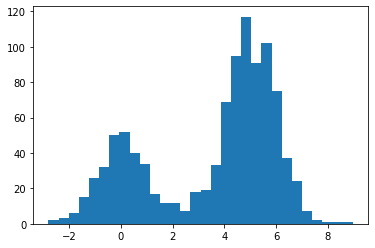

In [6]:
plt.hist(x, bins=30)
plt.show()

Sea $[a,b]$ el rango del dataset, entonces los rangos en los que se define el histograma de n bines son

- $[a,a+(b-a)/n)\rightarrow f_1$
- $[(b-a)/n,2(b-a)/n)\rightarrow f_2$
- $\cdots$
- $[(n-1)(b-a)/n,b]\rightarrow f_n$

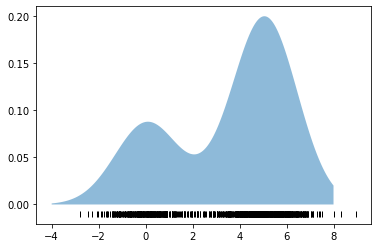

In [7]:
x_d = np.linspace(-4, 8, 2000)

# instanciamos y entrenamos el modelo
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples devuelve el logaritmo de la densidad de probabilidad
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5) # Gráfica del modelo 
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1) # Gráfica del conjunto de datos
#plt.ylim(-0.02, 0.22);

## Ancho de banda

La selección del ancho de banda es una pieza importante del KDE: **es el hiperparámetro que controla la compensación de sesgo-varianza** en la estimación de la función de densidad: 
- Un ancho de banda demasiado estrecho conduce a una estimación de alta varianza (sobreajuste) donde la presencia o ausencia de un solo punto hace una gran diferencia.
- Un ancho de banda demasiado ancho conduce a una estimación de alto sesgo (subajuste) donde la estructura de los datos es eliminada por el ancho del kernel.

(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <a list of 1 Patch objects>)

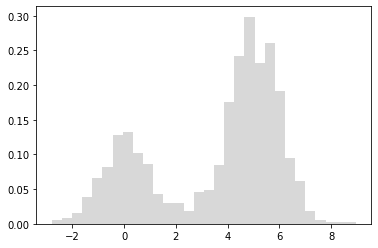

In [8]:
fig, ax = plt.subplots()
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)

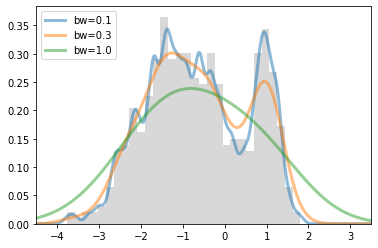

In [9]:
from scipy.stats.distributions import norm

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis]) # log-normal distribution is the continuous probability distribution of a random variable whose logarithm is normally distributed.
    return np.exp(log_pdf)


# Obteniendo puntos de una distribución bimodal en 1D
np.random.seed(0)
x_grid = np.linspace(-4.5, 3.5, 1000)

x = np.concatenate([norm(-1, 1.).rvs(400),
                    norm(1, 0.3).rvs(100)])
pdf_true = (0.8 * norm(-1, 1).pdf(x_grid) +
            0.2 * norm(1, 0.3).pdf(x_grid))

fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(x, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.5)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(-4.5, 3.5)
ax.legend(loc='upper left');

Usar diferentes anchos de banda puede conducir a ideas completamente diferentes de la naturaleza subyacente de los datos. Dada la importancia del ancho de banda, ¿cómo podríamos determinar el ancho de banda óptimo para un problema determinado? En el contexto del ML, hemos visto que tal ajuste de hiperparámetros a menudo se realiza empíricamente mediante validación cruzada. Usaremos GridSearchCV para optimizar el ancho de banda para el conjunto de datos anterior:

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

# valores para evaluar el ancho de banda
grid_param = {'bandwidth': np.linspace(0.1, 1.0, 30)}

grid = GridSearchCV(KernelDensity(kernel='gaussian'), grid_param, cv=20)

grid.fit(x[:, None])

grid.best_estimator_ # Objeto de la clase KernelDensity con el mejor bandwidth

KernelDensity(bandwidth=0.19310344827586207)

Según el puntaje de validación cruzada (es decir, la probabilidad máxima), el mejor ancho de banda es de alrededor de 0.19:

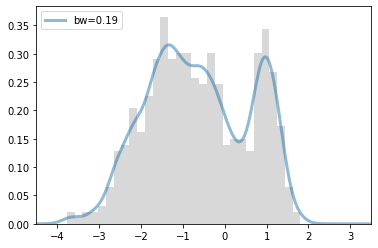

In [11]:
kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots()
ax.plot(x_grid, pdf, linewidth=3, alpha=0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(x, 30, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.legend(loc='upper left')
ax.set_xlim(-4.5, 3.5);

Vemos que la validación cruzada produce un ancho de banda que está cerca de lo que podríamos elegir a simple vista, y la estimación de densidad resultante refleja estrechamente la distribución de los datos subyacentes.

## Kernels

Hemos estado usando el kernel gaussiano, pero esta no es la única opción disponible. KDE se puede usar con cualquier función de [kernel](https://scikit-learn.org/stable/modules/density.html), y diferentes kernels conducen a estimaciones de densidad con diferentes características. Realicemos una visualización rápida de los seis kernels disponibles en Scikit-learn:

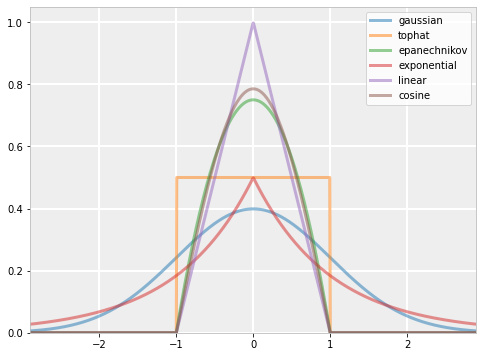

In [ ]:
#@title Tipos de kernel:
def plot_kernels():
    """Visualize the KDE kernels available in Scikit-learn"""
    fig, ax = plt.subplots(figsize=(8, 6),
                           subplot_kw={'facecolor':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='white', linestyle='-', linewidth=2)
    for spine in ax.spines.values():
        spine.set_color('#BBBBBB')

    X_src = np.zeros((1, 1))
    x_grid = np.linspace(-3, 3, 1000)

    for kernel in ['gaussian', 'tophat', 'epanechnikov',
                   'exponential', 'linear', 'cosine']:
        log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(x_grid[:, None])
        ax.plot(x_grid, np.exp(log_dens), lw=3, alpha=0.5, label=kernel)
    ax.set_ylim(0, 1.05)
    ax.set_xlim(-2.9, 2.9)
    ax.legend()
    
plot_kernels()

## Dependencia del Kernel

Para puntos lejanos, algunos kernels tienen pesos mucho más cercanos a cero que otros: en el caso de los kernels con límites "fuertes" (como el kernel tophat), los puntos distantes contribuyen exactamente con cero a la densidad. 

En el extremo opuesto, para los puntos que están muy cerca en comparación con el tamaño del kernel, los kernels que son muy "planos" (por ejemplo, kernel tophat) permitirán considerar grupos enteros de puntos a la vez, mientras que los núcleos que son menos planos (por ejemplo, el kernel gaussiano o exponencial) no admitirá tales eficiencias.

Podemos ver este comportamiento en la siguiente figura:

<p><img alt="Colaboratory logo" height="350px" src="https://i.imgur.com/wiH8jsx.png" align="left" hspace="10px" vspace="0px"></p>

Observe las dos regiones de interés: para anchos de banda muy pequeños, los kernels con un corte fuerte (tophat, lineal) superan a los kernels con un cono amplio (gaussiano, exponencial). Y los kernels cónicos que caen más rápidamente (gaussiano) se calculan de manera más eficiente que los kernels que caen más lentamente (exponencial).

En el otro extremo, los kernels con perfiles muy planos cerca de cero (tophat, gaussiano) muestran una mejora para anchos de banda grandes, mientras que los kernels con perfiles muy empinados cerca de cero (lineal, exponencial) no muestran ninguna mejora

# **Análisis de Componentes Principales (Principal Comptents Analysis)**


PCA es un método que consiste en rotar el dataset de tal forma que las componentes rotadas son estadisticamente no-correlacionadas. Si se desea también reducir la dimensionalidad, esta rotación es seguida de una selección de un subconjunto de características de acuerdo con su importancia.

## Intuición inicial
Tenemos los siguientes datos 2D y nos gustaría encontrar una proyección en 1D que preserve la máxima cantidad de variabilidad.

In [12]:
!pip install mglearn
import mglearn

     |████████████████████████████████| 540 kB 29.6 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=4a39bc528a2a9c05e2efc08438bdd4ece743572442db43a2cad318a26e2a66be
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


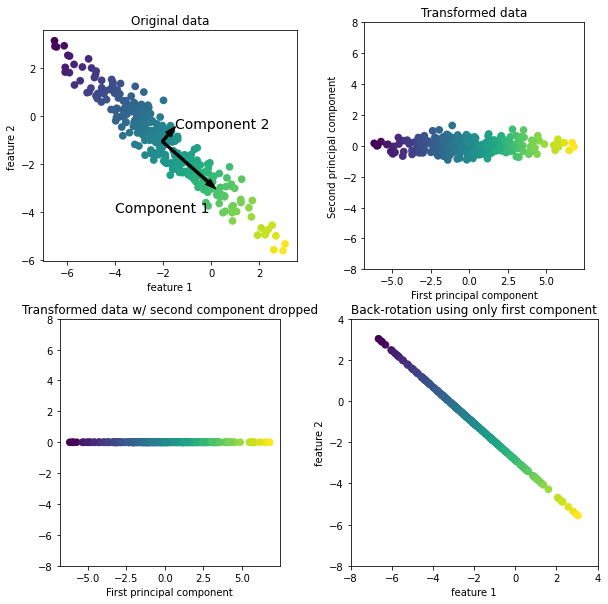

In [13]:
mglearn.plots.plot_pca_illustration()

## 2.2. Intuición práctica

(200, 2)


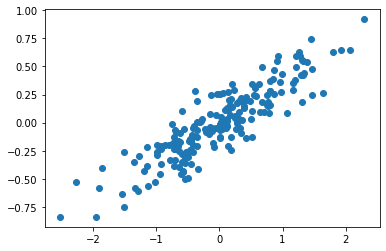

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

X = X-np.mean(X, axis=0)
print (X.shape)
plt.scatter(X[:,0], X[:,1]);

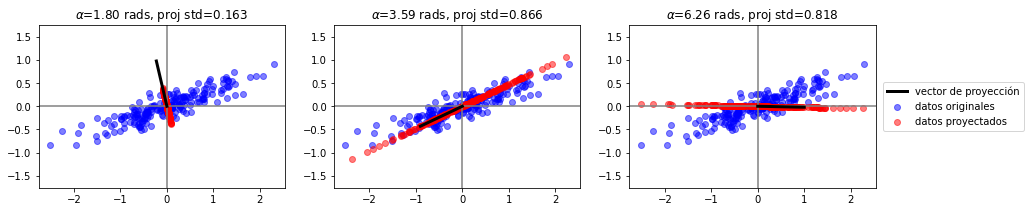

In [15]:
#@title Inspección de ángulos aleatorios
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2 if i!=0 else 1.8
    v = unit_vector(angle)

    c = X.dot(v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="datos originales")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="datos proyectados")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="vector de proyección")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

Implementemos PCA y veamos los resultados que obtenemos para dos y una componente.

In [16]:
from sklearn.decomposition import PCA

In [18]:
X

array([[-0.6588133 , -0.16598294],
       [ 0.92718335,  0.59498131],
       [-0.63205507, -0.39851268],
       [-2.26157106, -0.52849602],
       [-0.49494174, -0.49478653],
       [-0.99244071, -0.26525031],
       [-0.70659159, -0.33422783],
       [ 1.27150693,  0.59543856],
       [ 0.34103392, -0.09446349],
       [-1.85979795, -0.40208954],
       [ 0.6347506 ,  0.34095811],
       [-0.61615836, -0.1732885 ],
       [-0.45164066, -0.36973067],
       [ 0.13869769,  0.26874955],
       [ 0.34360501,  0.19252369],
       [-0.71290791, -0.12752126],
       [ 0.99797792,  0.42963074],
       [ 0.30253012,  0.04317899],
       [ 0.6722343 ,  0.49281137],
       [ 0.80599987,  0.15620659],
       [ 1.4653173 ,  0.47546153],
       [ 0.25484496,  0.03721419],
       [-0.53644669, -0.36458471],
       [ 1.44569899,  0.74452644],
       [-0.47789411, -0.16093865],
       [-0.56697591, -0.05614147],
       [-0.6497411 , -0.2077032 ],
       [ 0.04114822, -0.05735139],
       [-0.14714869,

In [17]:
pca2 = PCA(n_components=2) 
pca2.fit(X)
print("Componentes")
print(pca2.components_)
print("Norma de las componentes")
print(pca2.explained_variance_)

Componentes
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
Norma de las componentes
[0.7625315 0.0184779]


In [ ]:
sum(pca2.explained_variance_)

0.7810093963961741

In [19]:
pca = PCA(n_components=1) 
pca.fit(X)
print("Componentes")
print(pca.components_)
print("Norma de las componentes")
print(pca.explained_variance_)

Componentes
[[-0.94446029 -0.32862557]]
Norma de las componentes
[0.7625315]


Las componentes principales corresponden a las direcciones en los datos originales, por lo tanto son combinaciones de las características originales. Cada fila en `components_` corresponde a una componente principal y se organizan dependiendo de su importancia. Asímismo, cada columna corresponde a cada una de las caraterísticas originales. Las entradas de `explained_variance_` corresponden a la norma de los vectores de las componentes principales, los cuales indican que tan "importante" es el respectivo eje en la descripción de la distribución de los datos. 


Veamos ahora como quedan nuestros datos transformados.

In [20]:
Xt = pca.transform(X)
X.shape,pca.transform(X).shape,pca2.transform(X).shape

((200, 2), (200, 1), (200, 2))

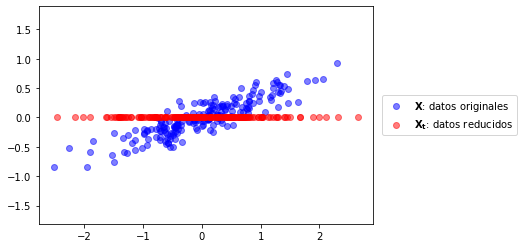

In [21]:
Xt = pca.transform(X)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: datos originales")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: datos reducidos")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

y podemos también reconstruir los datos 2D después de la transformación

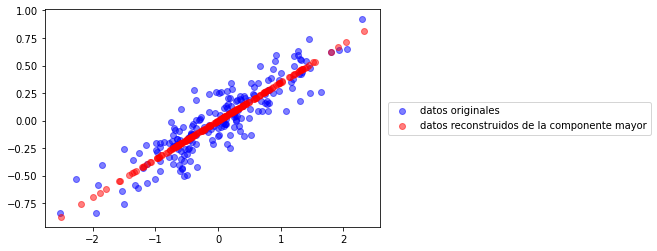

In [22]:
Xr = pca.inverse_transform(Xt)
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="datos originales")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="datos reconstruidos de la componente mayor")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5));

## 2.3. Usando PCA para visualizar datos multidimensionales

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

In [24]:
# cargamos los datos y los estandarizamos
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [25]:
np.shape(cancer.feature_names)

(30,)

In [26]:
X_scaled.shape

(569, 30)

In [43]:
# aplicamos PCA con dos componentes principales
pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Forma original: {}".format(str(X_scaled.shape)))
print("Forma reducida: {}".format(str(X_pca.shape)))

Forma original: (569, 30)
Forma reducida: (569, 2)


In [44]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208])

Text(0, 0.5, 'PCA2')

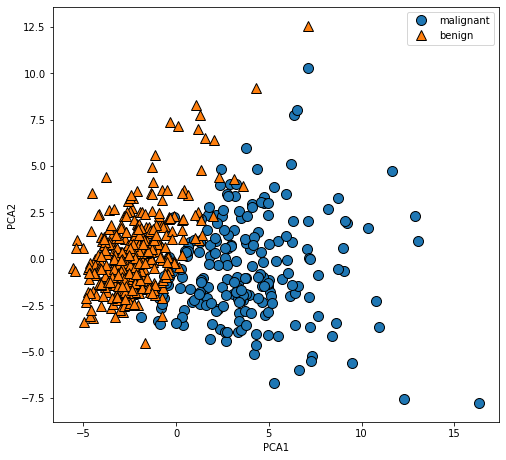

In [45]:
# graficamos en el espacio de las componentes
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

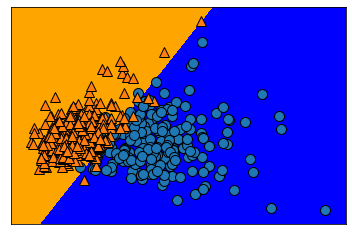

In [46]:
# entrenamos un regresor LG
clf = LogisticRegression(solver="liblinear")
clf.fit(X_pca,cancer.target)

mglearn.plots.plot_2d_classification(clf,X_pca,fill=True, cm=ListedColormap(['blue','orange']))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.show();

In [47]:
X_train, X_test, y_train, y_test=train_test_split(X_pca,cancer.target,
                                                  test_size=0.2,random_state=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94        39
           1       0.96      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[36  3]
 [ 2 73]]


Veamos ahora los resultados de la clasificación si no hubiesemos hecho la reducción de dimensionalidad con PCA.

In [48]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled,cancer.target,
                                                  test_size=0.2,random_state=10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print (classification_report(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        39
           1       0.97      0.97      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[37  2]
 [ 2 73]]


Vemos que en ambos casos obtenemos resultados muy similares. Para tener una mejor visualización del número estimado de componentes que se necesitan para describir los datos, podemos utilizar lo que se conoce como razón de la varianza acumulativa en función del número de componentes:

In [49]:
pca.explained_variance_ratio_.shape

(2,)

In [50]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208])

In [52]:
PCA(n_components=2).fit(cancer.data).explained_variance_ratio_

array([0.98204467, 0.01617649])

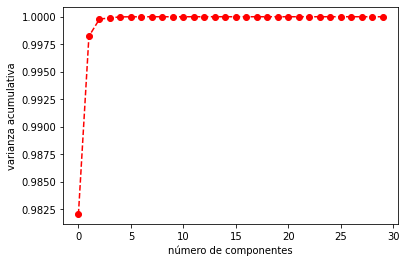

In [51]:
pca = PCA().fit(cancer.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro--')
plt.xlabel('número de componentes')
plt.ylabel('varianza acumulativa');

La curva cuantifica cuánto de la varianza total está contenida en las primeras N componentes. Observamos que, en este caso, las dos primeras componentes contienen alrededor del 99% de la varianza, y se necesitan alrededor de tres componentes para describir cerca del 100% de la varianza. 

Aternativamente, el hiperparámetro `n_components` puede ser usado en el rango (0,1), con lo cual se indica al modelo que contenga un cierto porcentaje de la varianza, y el modelo nos devolverá el número de componentes necesarias para tener ese porcentaje de varianza:  

In [53]:
# reteniendo el 50 % de la varianza
pca = PCA(n_components=0.99).fit(cancer.data)

print("Número de componentes: ",pca.n_components_)

Número de componentes:  2


Podemos concluir entonces que para este dataset, haber tomado solo dos componentes principales permite visualizar que la separación de los datos es lineal sin perder calidad en los resultados.

## 2.4. Usando KDE y PCA 

Este ejemplo muestra cómo el KDE puede usarse para aprender un modelo generativo para un conjunto de datos. Con este modelo generativo se pueden extraer nuevas muestras. Lo implementaremos en el ya conocido dataset de dígitos:



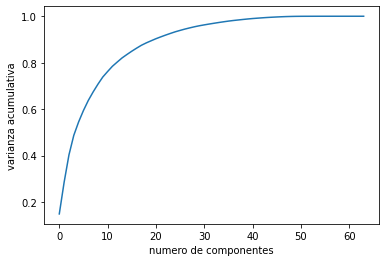

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# cargamos los datos
digits = load_digits()

# veamos la razón de la varianza acumulativa
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('numero de componentes')
plt.ylabel('varianza acumulativa');

Ancho de banda óptimo: 3.79269019073225


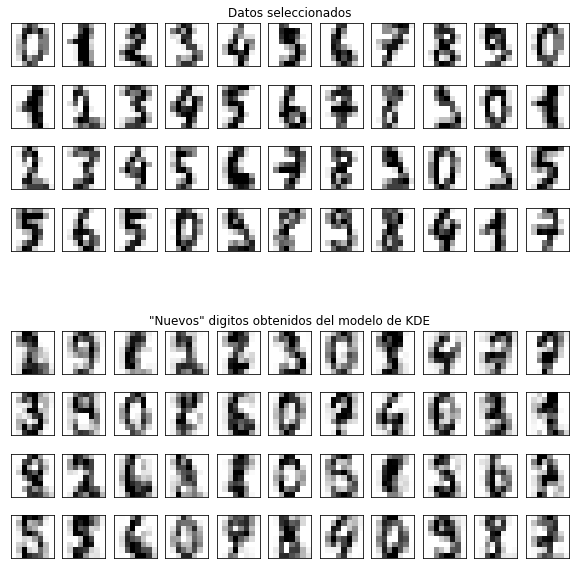

In [56]:
# proyectamos los datos (64 dimensiones) a una dimension menor (15)
pca = PCA(n_components=20)
data = pca.fit_transform(digits.data)

# usamos gridsearch para obtener el valor optimo del ancho de banda
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params, cv=5)
grid.fit(data)

print("Ancho de banda óptimo: {0}".format(grid.best_estimator_.bandwidth))

# usamos el mejor estimador para el KDE
kde = grid.best_estimator_

# tomamos 44 nuevos puntos de los datos
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)

# convertimos los datos a una grilla de 4x11
new_data = new_data.reshape((4, 11, -1))
real_data = digits.data[:44].reshape((4, 11, -1))

# graficamos los digitos reales y los digitos remuestreados
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]),figsize=(10,10))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(real_data[i, j].reshape((8, 8)),
                             cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(new_data[i, j].reshape((8, 8)),
                                 cmap=plt.cm.binary, interpolation='nearest')
        im.set_clim(0, 16)

ax[0, 5].set_title('Datos seleccionados')
ax[5, 5].set_title('"Nuevos" digitos obtenidos del modelo de KDE')

plt.show()